<hr>
<center><h2>Image analysis and creating dataset</h2></center>
<hr>

## 1. Loading the data


Importing all necessaray packages, loading the dataand creating session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
caption_data = pd.read_csv("../archive/captions.txt")
caption_data.head(10)

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


In [3]:
caption_data.isna().sum()

image      0
caption    0
dtype: int64

## 2. Analysing the image

We are using imagenet for finding the objects in the image

The grad cam code is taken from : https://keras.io/examples/vision/grad_cam/

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

In [5]:
model = VGG16(weights='imagenet')

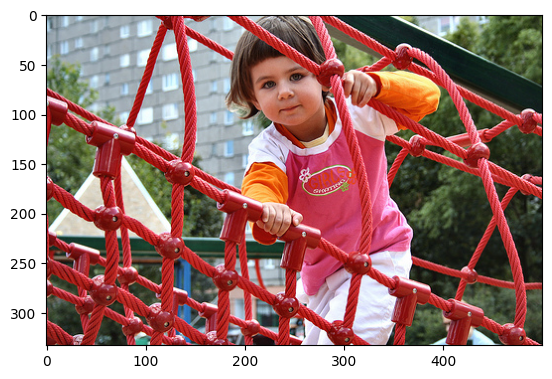

In [6]:
image_dir = "../archive/Images/"
first_image = caption_data.loc[25]["image"]

img = image.load_img(f"{image_dir}/{first_image}")
plt.imshow(img)

In [7]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model_without_last_step = model.layers.pop()

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Model
import keras

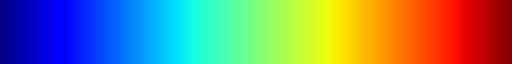

In [10]:
from matplotlib import colormaps
colormaps["jet"]

In [11]:

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [12]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    return superimposed_img


In [13]:
def split_image_func(image, patch_size):
    width, height = image.size
    patches = []
    for i in range(0, width, patch_size):
        for j in range(0, height, patch_size):
            box = (i, j, i + patch_size, j + patch_size)
            patch = image.crop(box)
            patches.append(patch)
    return patches

def preprocess_image(img_path, split_image=False, patch_size=50):
    img = image.load_img(img_path, target_size=(224, 224)) #target size of (224, 224)
    if split_image:
        patches = split_image_func(img, patch_size=patch_size)
        image_array = []
        for patch in patches:
            img_array = patch.resize((224, 224))
            img_array = image.img_to_array(img_array)
            img_array = np.expand_dims(img_array, axis=0) # Add an extra dimension for batch size
            img_array = preprocess_input(img_array)
            image_array.append(img_array)
    else:
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) # Add an extra dimension for batch size
        image_array = preprocess_input(img_array)
    return img, image_array

def get_prediction(image_model, image_path, split_image=False, patch_size=50):
    img, img_array = preprocess_image(image_path, split_image=split_image, patch_size=patch_size)
    prediction = []
    if type(img_array) == list:
        for arr in img_array:
            pred = image_model.predict(arr)
            pred = decode_predictions(pred, top=2)
            prediction.append(pred)
    else:
        prediction = image_model.predict(img_array)
        prediction = decode_predictions(prediction, top=5)
    return img, prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
['chainlink_fence', 'hip', 'king_crab', 'picket_fence', 'walking_stick']


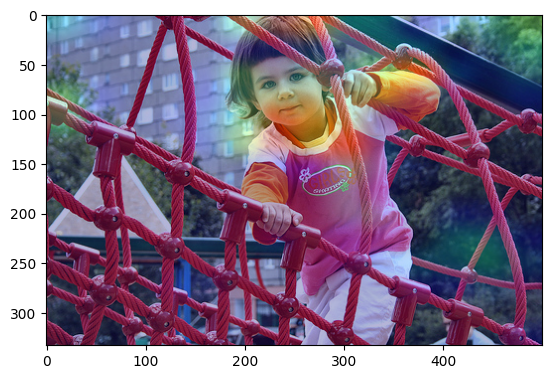

In [14]:
model_without_last_step =  Model(inputs=model.inputs, outputs=model.layers[-2].output)
_, img_array = preprocess_image(f"{image_dir}/{first_image}")
heatmap = make_gradcam_heatmap(img_array, model=model_without_last_step, last_conv_layer_name="block5_conv3", pred_index=260)
superimposed_img = save_and_display_gradcam(f"{image_dir}/{first_image}", heatmap)
plt.imshow(superimposed_img)
_, prediction = get_prediction(model, f"{image_dir}/{first_image}", split_image=False)
print([pred[1] for pred in prediction[0]])

We can either analyse all components of image by creating a window and run it though the image, or analyse the whole image in one go

In [15]:
img, prediction = get_prediction(model, f"{image_dir}/{first_image}", split_image=True, patch_size=100)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


[[[('n03627232', 'knot', 0.5702306), ('n03733131', 'maypole', 0.06628598)]],
 [[('n01981276', 'king_crab', 0.93237257), ('n03627232', 'knot', 0.02401823)]],
 [[('n03874293', 'paddlewheel', 0.25268605),
   ('n01981276', 'king_crab', 0.2144981)]],
 [[('n01981276', 'king_crab', 0.660457),
   ('n01983481', 'American_lobster', 0.062191613)]],
 [[('n01981276', 'king_crab', 0.8695959),
   ('n01985128', 'crayfish', 0.028746309)]],
 [[('n03874293', 'paddlewheel', 0.6375555),
   ('n01983481', 'American_lobster', 0.076280914)]],
 [[('n03627232', 'knot', 0.1123886),
   ('n01773549', 'barn_spider', 0.05297798)]],
 [[('n03627232', 'knot', 0.43443853), ('n02999410', 'chain', 0.029150778)]],
 [[('n03627232', 'knot', 0.06896837), ('n01770393', 'scorpion', 0.02996528)]]]

In [16]:
img, prediction = get_prediction(model, f"{image_dir}/{first_image}", split_image=False)
prediction[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


[('n03000134', 'chainlink_fence', 0.76401657),
 ('n12620546', 'hip', 0.08852901),
 ('n01981276', 'king_crab', 0.034083355),
 ('n03930313', 'picket_fence', 0.033905763),
 ('n02231487', 'walking_stick', 0.019301536)]

As it can be seen, if we use window, the predictions are too many, and not too accurate and it consumes more time

## 3. Creating the dataset

The total time consumption for creating the whole dataset is too long, thus doing it on the subset here. However, the parquet saved is using the whole image dataset.

In [17]:
# The dataset is already generated with full feed, however it takes a long time so, creating a subset for reruns
caption_data = caption_data.head(100)
caption_data.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [18]:
seen_image = {}
image_net_pred = []
for i,row in caption_data.iterrows():
    if row["image"] not in seen_image:
        _, prediction = get_prediction(model, f"{image_dir}/{row["image"]}", split_image=False)
        prediction = [pred[1] for pred in prediction[0]]
        image_net_pred.append(prediction)
        seen_image[row["image"]] = prediction
    else:
        image_net_pred.append(seen_image.get(row["image"]))
        
image_net_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


[['apiary', 'greenhouse', 'pot', 'rain_barrel', 'milk_can'],
 ['apiary', 'greenhouse', 'pot', 'rain_barrel', 'milk_can'],
 ['apiary', 'greenhouse', 'pot', 'rain_barrel', 'milk_can'],
 ['apiary', 'greenhouse', 'pot', 'rain_barrel', 'milk_can'],
 ['apiary', 'greenhouse', 'pot', 'rain_barrel', 'milk_can'],
 ['Greater_Swiss_Mountain_dog',
  'Walker_hound',
  'toy_terrier',
  'Boston_bull',
  'beagle'],
 ['Greater_Swiss_Mountain_dog',
  'Walker_hound',
  'toy_terrier',
  'Boston_bull',
  'beagle'],
 ['Greater_Swiss_Mountain_dog',
  'Walker_hound',
  'toy_terrier',
  'Boston_bull',
  'beagle'],
 ['Greater_Swiss_Mountain_dog',
  'Walker_hound',
  'toy_terrier',
  'Boston_bull',
  'beagle'],
 ['Greater_Swiss_Mountain_dog',
  'Walker_hound',
  'toy_terrier',
  'Boston_bull',
  'beagle'],
 ['mountain_tent', 'parachute', 'umbrella', 'bib', 'purse'],
 ['mountain_tent', 'parachute', 'umbrella', 'bib', 'purse'],
 ['mountain_tent', 'parachute', 'umbrella', 'bib', 'purse'],
 ['mountain_tent', 'parachu

In [19]:
caption_data["image_net_class"] = image_net_pred

In [20]:
caption_data

,image,caption,image_net_class
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,"[apiary, greenhouse, pot, rain_barrel, milk_can]"
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,"[apiary, greenhouse, pot, rain_barrel, milk_can]"
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,"[apiary, greenhouse, pot, rain_barrel, milk_can]"
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,"[apiary, greenhouse, pot, rain_barrel, milk_can]"
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,"[apiary, greenhouse, pot, rain_barrel, milk_can]"
...,...,...,...
95,102351840_323e3de834.jpg,A man drilling a hole in the ice .,"[snowplow, shovel, lifeboat, ski, pole]"
96,102351840_323e3de834.jpg,A man is drilling through the frozen ice of a ...,"[snowplow, shovel, lifeboat, ski, pole]"
97,102351840_323e3de834.jpg,A person in the snow drilling a hole in the ice .,"[snowplow, shovel, lifeboat, ski, pole]"
98,102351840_323e3de834.jpg,A person standing on a frozen lake .,"[snowplow, shovel, lifeboat, ski, pole]"


In [21]:
# caption_data.to_parquet("../output/caption_data.parquet") # commenting to prevent override